In [6]:
using TreeTools, TreeKnit, Plots, TestRecombTools

In [7]:
function check_issues(lineage_number::Int)   
    repeat = true
    while repeat == true
        no_trees = 3
        trees, arg = TreeKnit.get_trees(no_trees, lineage_number, remove=true, c=0.2 + 0.6*rand(), ρ = 0.1);
        old_trees = [copy(t) for t in trees]
        label!(trees[1], "a")
        label!(trees[2], "b")
        label!(trees[3], "c")
        rMCC_list = TreeKnit.get_real_MCCs(no_trees, arg)
        rMCCs = TreeKnit.convert_MCC_list_to_set(3, ["a", "b", "c"], rMCC_list)
        iMCCs = TreeKnit.get_infered_MCC_pairs!(trees, consistant = true, order="input", rev=false, constraint_cost=4.)
        for t in trees
            for node in POT(t)
                node.tau = 1
            end
        end
        c1 = TreeKnit.consistency_rate(TreeKnit.iter_pairs(iMCCs)[2]..., trees)
        if sum(c1) > 0
            iMCCs_fixed = TreeKnit.fix_consist_sets!(iMCCs, trees)
            c2 = TreeKnit.consistency_rate(TreeKnit.iter_pairs(iMCCs_fixed)[2]..., trees)
            if sum(c2)>0
                print("\n real MCCs:")
                print(rMCCs)
                print("\n infered MCCs:")
                print(iMCCs)
                print(c1)
                print("\n fixed infered MCCs:")
                print(iMCCs_fixed)
                print(c2)
                print("\n trees:")
                print(TreeKnit.write_newick(trees[1]))
                print(TreeKnit.write_newick(trees[2]))
                print(TreeKnit.write_newick(trees[3]))
                print_tree_ascii(" ", trees[1])
                print_tree_ascii(" ", trees[2])
                print_tree_ascii(" ", trees[3])
                print("\n old trees")
                print(TreeKnit.write_newick(old_trees[1]))
                print(TreeKnit.write_newick(old_trees[2]))
                print(TreeKnit.write_newick(old_trees[3]))
                repeat = false
            end
        end
    end
end

check_issues (generic function with 1 method)

In [8]:
function check_treeknit(lineage_number::Int)   
    repeat = true
    count_s = []
    count_b = []
    count_1 = []
    count_2 = []
    no_trees = 3
    for r in 1:100
        trees, arg = TreeKnit.get_trees(no_trees, lineage_number, remove=true, c=0.2 + 0.6*rand());
        label!(trees[1], "a")
        label!(trees[2], "b")
        label!(trees[3], "c")
        rMCC_list = TreeKnit.get_real_MCCs(no_trees, arg)
        rMCCs = TreeKnit.convert_MCC_list_to_set(3, ["a", "b", "c"], rMCC_list)

        input_trees = [copy(t) for t in trees]
        sMCCs = TreeKnit.compute_consecutive_MCC_set(input_trees)
        cs = TreeKnit.consistency_rate(TreeKnit.iter_pairs(sMCCs)[2]..., input_trees)

        input_trees = [copy(t) for t in trees]
        bMCCs = TreeKnit.get_infered_MCC_pairs!(input_trees, consistant = false, order="input", rev=false, constraint_cost=4.)
        cb = TreeKnit.consistency_rate(TreeKnit.iter_pairs(bMCCs)[2]..., input_trees)
        
        input_trees = [copy(t) for t in trees]
        iMCCs = TreeKnit.get_infered_MCC_pairs!(input_trees, consistant = true, order="input", rev=false, constraint_cost=4.)
        c1 = TreeKnit.consistency_rate(TreeKnit.iter_pairs(iMCCs)[2]..., input_trees)
        c1_full = TreeKnit.consistency_rate(iMCCs, input_trees)
        @assert sum(c1)/3 == c1_full
        @assert TreeKnit.is_degenerate(iMCCs) == (sum(c1)!=0.0)
        
        input_trees = [copy(t) for t in trees]
        iMCCs_c = TreeKnit.get_infered_MCC_pairs!(input_trees, consistant = true, force=true, order="input", rev=false, constraint_cost=4., force_rounds=1)
        c2 = TreeKnit.consistency_rate(TreeKnit.iter_pairs(iMCCs_c)[2]..., input_trees)

        append!(count_s, sum(cs)/3)
        append!(count_b, sum(cb)/3)
        append!(count_1, sum(c1)/3)
        append!(count_2, sum(c2)/3)
        #@assert TreeKnit.is_degenerate(iMCCs_c) == (sum(c2)!=0.0)
    end
    return count_s, count_b, count_1, count_2              
end

check_treeknit (generic function with 1 method)

In [9]:
count_s, count_b, count_1, count_2 = check_treeknit(100)

(Any[0.024390243902439022, 0.20679012345679013, 0.04268549469548436, 0.14718614718614717, 0.014238688838008898, 0.37126612828367217, 0.1951269354373798, 0.0033333333333333335, 0.3388986592111592, 0.013168966334174775  …  0.07202680067001675, 0.03055588296924931, 0.004672897196261682, 0.04353274332223974, 0.25368611970553717, 0.02421874062473749, 0.06784724188417623, 0.13367174280879865, 0.030528028686408058, 0.024915640014871194], Any[0.017358090777294524, 0.018922852983988356, 0.03895392698471067, 0.027149321266968326, 0.007782101167315175, 0.013595787568390307, 0.05880033587674783, 0.008710089399744573, 0.041494110524991905, 0.0  …  0.02734375, 0.015194681861348527, 0.0, 0.012468399371758601, 0.013375209380234504, 0.012345679012345678, 0.019696969696969695, 0.07647907647907648, 0.014991181657848324, 0.01809500050042094], Any[0.025232403718459497, 0.01908957415565345, 0.03304222901443012, 0.03840245775729647, 0.0, 0.031700369461601374, 0.007575757575757576, 0.0, 0.032520325203252036, 

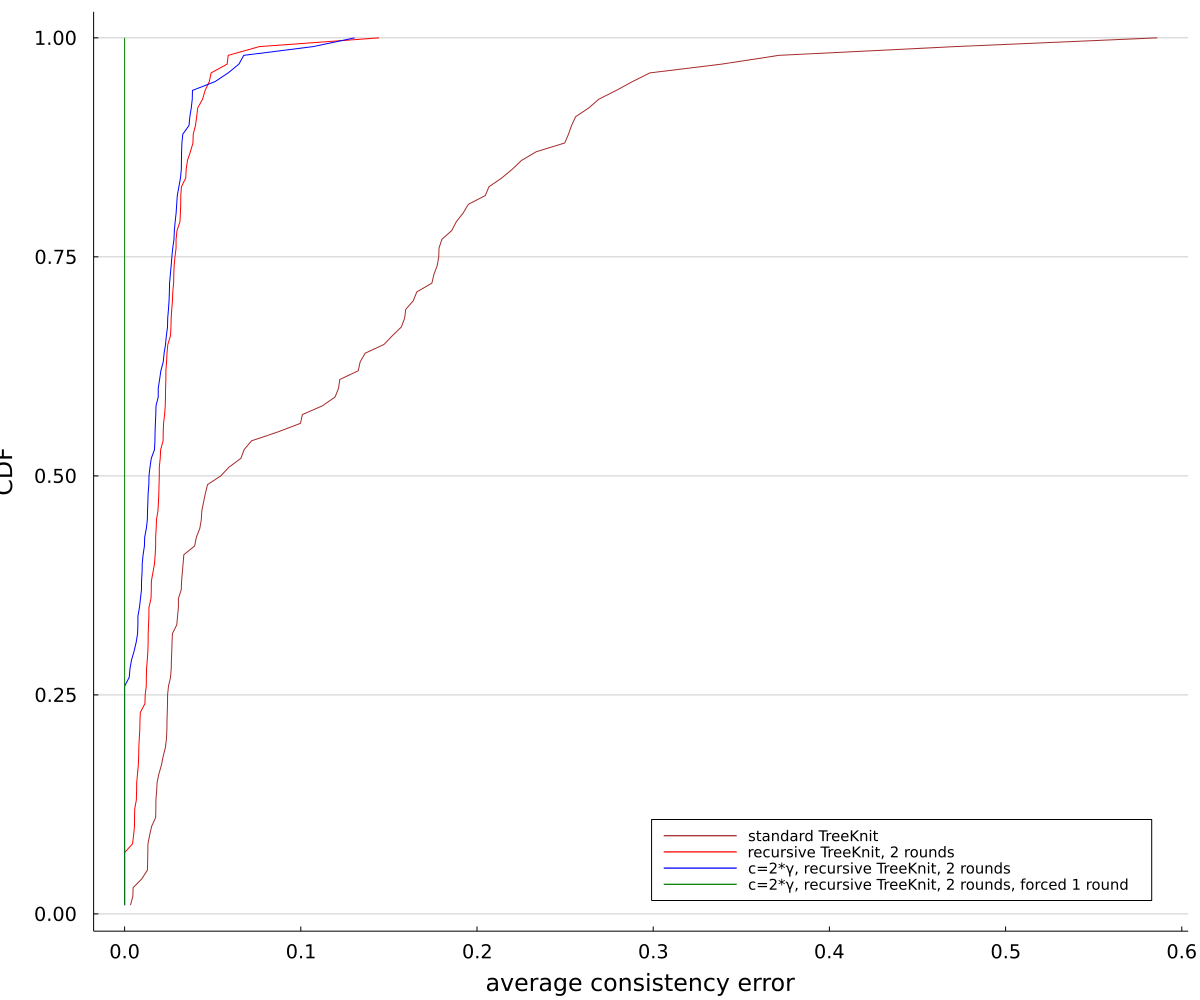

In [10]:

gr(size=(1200,1000), xtickfontsize=13, ytickfontsize=13, xguidefontsize=16, yguidefontsize=16, legendfontsize=10, dpi=100, grid=(:y, :gray, :solid, 1, 0.4));
 
plot(sort(count_s) , range(1, 100)/100, label="standard TreeKnit", ylabel="CDF", xlabel="average consistency error", linecolor="brown", legend = :bottomright)
plot!(sort(count_b) , range(1, 100)/100, label="recursive TreeKnit, 2 rounds", linecolor="red", legend = :bottomright)
plot!(sort(count_1) , range(1, 100)/100, label="c=2*γ, recursive TreeKnit, 2 rounds", linecolor="blue")
plot!(sort(count_2), range(1, 100)/100, label="c=2*γ, recursive TreeKnit, 2 rounds, forced 1 round", linecolor="green")

In [11]:
function check_VI(lineage_number::Int)   
    repeat = true
    count_s = []
    count_b = []
    count_1 = []
    count_2 = []
    no_trees = 3
    for r in 1:100
        trees, arg = TreeKnit.get_trees(no_trees, lineage_number, remove=true, c=0.2 + 0.6*rand());
        label!(trees[1], "a")
        label!(trees[2], "b")
        label!(trees[3], "c")
        rMCC_list = TreeKnit.get_real_MCCs(no_trees, arg)
        rMCCs = TreeKnit.convert_MCC_list_to_set(3, ["a", "b", "c"], rMCC_list)

        input_trees = [copy(t) for t in trees]
        sMCCs = TreeKnit.compute_consecutive_MCC_set(input_trees)

        input_trees = [copy(t) for t in trees]
        bMCCs = TreeKnit.get_infered_MCC_pairs!(input_trees, consistant = false, order="input", rev=false, constraint_cost=4.)
        
        input_trees = [copy(t) for t in trees]
        iMCCs = TreeKnit.get_infered_MCC_pairs!(input_trees, consistant = true, order="input", rev=false, constraint_cost=4.)
        
        input_trees = [copy(t) for t in trees]
        iMCCs_c = TreeKnit.get_infered_MCC_pairs!(input_trees, consistant = true, force=true, order="input", rev=false, constraint_cost=4., force_rounds=1)

        var_s = []
        var_b = []
        var_1 = []
        var_2 = []
        for i in 1:2
            for j in (i+1):3
                pos = (trees[i].label, trees[j].label)
                append!(var_s, TestRecombTools.varinfo_similarity(get(rMCCs, pos), get(sMCCs, pos)))
                append!(var_b, TestRecombTools.varinfo_similarity(get(rMCCs, pos), get(bMCCs, pos)))
                append!(var_1, TestRecombTools.varinfo_similarity(get(rMCCs, pos), get(iMCCs, pos)))
                append!(var_2, TestRecombTools.varinfo_similarity(get(rMCCs, pos), get(iMCCs_c, pos)))
            end
        end

        append!(count_s, sum(var_s)/3)
        append!(count_b, sum(var_b)/3)
        append!(count_1, sum(var_1)/3)
        append!(count_2, sum(var_2)/3)
        #@assert TreeKnit.is_degenerate(iMCCs_c) == (sum(c2)!=0.0)
    end
    return count_s, count_b, count_1, count_2              
end

check_VI (generic function with 1 method)

Any[0.06515408305001331, 0.06701731005412258, 0.09938830726792537, 0.1074034366429354, 0.1096106927165158, 0.10969219564128592, 0.1102158002262708, 0.11229721438937312, 0.11320953556062574, 0.11427330327140543, 0.11692420640907587, 0.11893370797413912, 0.12141947613387587, 0.12329010901648328, 0.12335931974265744, 0.12356857019645744, 0.13008618557263057, 0.13369693046211975, 0.13468041383411838, 0.13489701577674792, 0.13788963864820347, 0.13927150831067678, 0.13976787308712366, 0.14928774234383949, 0.14970632245865323, 0.15046664787223576, 0.15260521014185513, 0.15306151881550364, 0.1540373269618865, 0.15411462111493363, 0.15441105544236644, 0.15585093653031074, 0.157526325780294, 0.15889825630961713, 0.15948057744483493, 0.16181340831280688, 0.1621077678903051, 0.16348660006487056, 0.1662061425869038, 0.1697709298819107, 0.1712252199095378, 0.17247588296512714, 0.17337043240622307, 0.1741765543349061, 0.1752664992247266, 0.17887841496623105, 0.18048586851339232, 0.18054966917988005, 

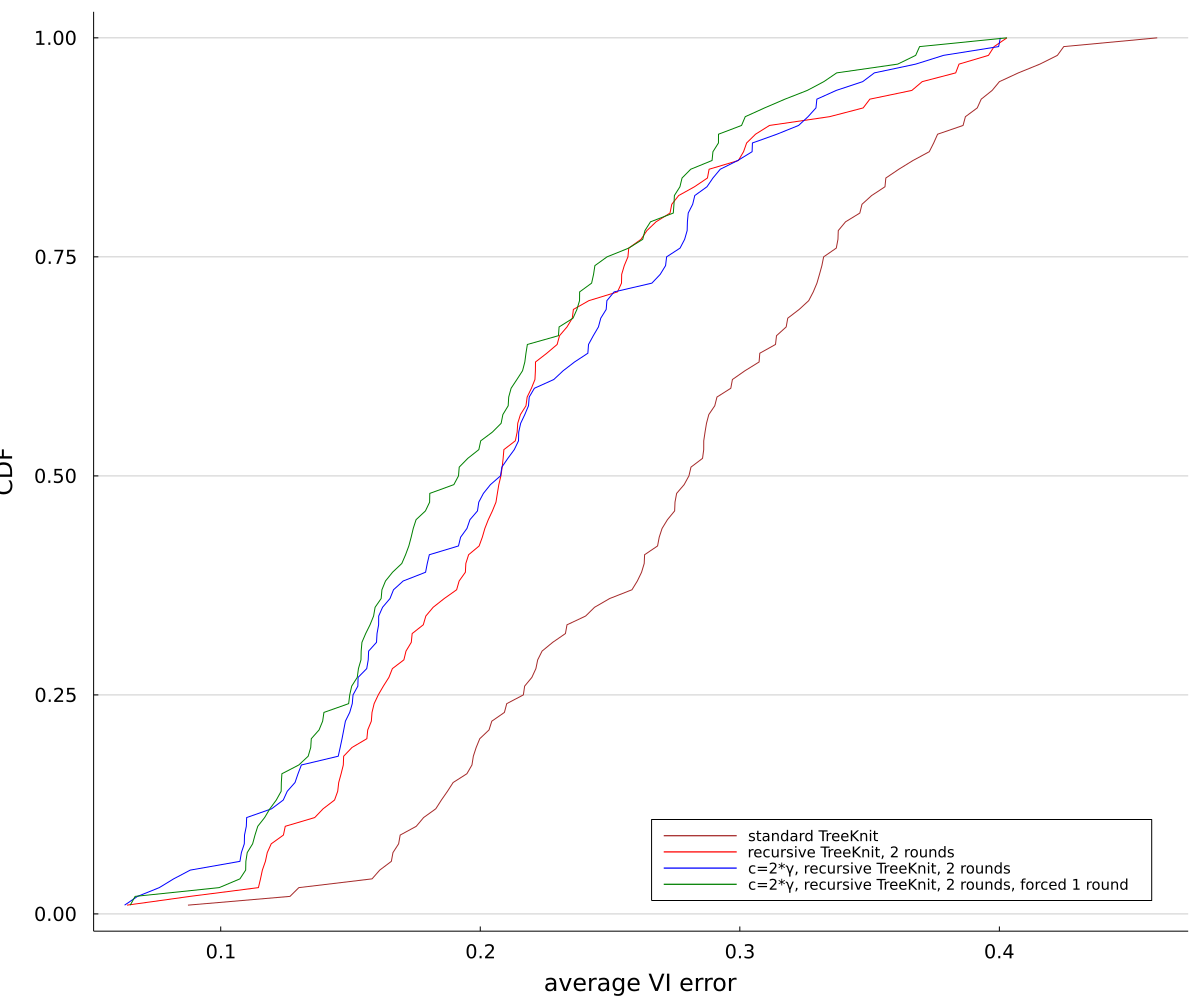

In [12]:
count_s, count_b, count_1, count_2 = check_VI(100)
print(sort(count_2))


gr(size=(1200,1000), xtickfontsize=13, ytickfontsize=13, xguidefontsize=16, yguidefontsize=16, legendfontsize=10, dpi=100, grid=(:y, :gray, :solid, 1, 0.4));
 
plot(sort(count_s) , range(1, 100)/100, label="standard TreeKnit", ylabel="CDF", xlabel="average VI error", linecolor="brown", legend = :bottomright)
plot!(sort(count_b) , range(1, 100)/100, label="recursive TreeKnit, 2 rounds", linecolor="red", legend = :bottomright)
plot!(sort(count_1) , range(1, 100)/100, label="c=2*γ, recursive TreeKnit, 2 rounds", linecolor="blue")
plot!(sort(count_2), range(1, 100)/100, label="c=2*γ, recursive TreeKnit, 2 rounds, forced 1 round", linecolor="green")